<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#PROJECT-2-Part-2" data-toc-modified-id="PROJECT-2-Part-2-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>PROJECT 2 Part 2</a></span><ul class="toc-item"><li><span><a href="#MODEL-BUILDING" data-toc-modified-id="MODEL-BUILDING-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>MODEL BUILDING</a></span></li><li><span><a href="#Contents:" data-toc-modified-id="Contents:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Contents:</a></span><ul class="toc-item"><li><span><a href="#Identifying-Coefficients" data-toc-modified-id="Identifying-Coefficients-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Identifying Coefficients</a></span><ul class="toc-item"><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-1.2.1.1"><span class="toc-item-num">1.2.1.1&nbsp;&nbsp;</span>Train Test Split</a></span></li><li><span><a href="#Scaling-the-Data-and-Instantiating-the-Lasso-Regression-Model" data-toc-modified-id="Scaling-the-Data-and-Instantiating-the-Lasso-Regression-Model-1.2.1.2"><span class="toc-item-num">1.2.1.2&nbsp;&nbsp;</span>Scaling the Data and Instantiating the Lasso Regression Model</a></span></li><li><span><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-1.2.1.3"><span class="toc-item-num">1.2.1.3&nbsp;&nbsp;</span>Cross Validation</a></span></li><li><span><a href="#Model-Fitting-and-Evaluation" data-toc-modified-id="Model-Fitting-and-Evaluation-1.2.1.4"><span class="toc-item-num">1.2.1.4&nbsp;&nbsp;</span>Model Fitting and Evaluation</a></span></li><li><span><a href="#Dropping-of-0-valued-co-efficients-features" data-toc-modified-id="Dropping-of-0-valued-co-efficients-features-1.2.1.5"><span class="toc-item-num">1.2.1.5&nbsp;&nbsp;</span>Dropping of 0 valued co-efficients features</a></span></li></ul></li><li><span><a href="#Modeling--for-predictions" data-toc-modified-id="Modeling--for-predictions-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Modeling  for predictions</a></span><ul class="toc-item"><li><span><a href="#Lasso-Regression" data-toc-modified-id="Lasso-Regression-1.2.2.1"><span class="toc-item-num">1.2.2.1&nbsp;&nbsp;</span>Lasso Regression</a></span></li></ul></li><li><span><a href="#Model-Decision" data-toc-modified-id="Model-Decision-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Model Decision</a></span></li><li><span><a href="#Test-Dataset-Prediction" data-toc-modified-id="Test-Dataset-Prediction-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Test Dataset Prediction</a></span></li></ul></li><li><span><a href="#Submission-and-Conclusion" data-toc-modified-id="Submission-and-Conclusion-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Submission and Conclusion</a></span></li></ul></li></ul></div>

# PROJECT 2 Part 2

## MODEL BUILDING

In the previous part, I have explored, cleaned the dataset and selected features which I will begin modeling with. In this part, I will do another cleaning first which is to root out 0 value coefficients. Using the dataset, I will used four different methods to built my final model.

In [1]:
## importing of library
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNet, ElasticNetCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
test_cleaned = pd.read_csv('datasets/test_cleaned.csv')
train_cleaned = pd.read_csv('datasets/train_cleaned.csv')
test = pd.read_csv('datasets/test.csv')

In [3]:
#Display all rows and columns of dataset
pd.set_option('display.max_rows',None) 
pd.set_option('display.max_columns',None) 

## Contents:

 - [Identifying Coefficients](#Identifying-Coefficients)
 - [Modeling for Prediction](#Modeling-for-Prediction)
 - [Model Decision](#Model-Decision)
 - [Test Dataset Prediction](#Test-Dataset-Prediction)

In the first section of the model building, I will be using the Lasso regression to remove coefficients with the value of 0. 

### Identifying Coefficients

The Lasso model is able to reduce the beta coefficients of the features that do not contribute to zero. Therefore, we will be using it to find those coefficients.

In [4]:
#shape of the dataset
train_cleaned.shape

(2046, 43)

In [5]:
train_cleaned.head()

,lot frontage,lot area,overall qual,mas vnr area,exter qual,bsmt qual,bsmt exposure,bsmtfin type 1,total bsmt sf,heating qc,gr liv area,kitchen qual,totrms abvgrd,fireplaces,fireplace qu,garage finish,garage cars,garage area,garage qual,garage cond,wood deck sf,saleprice,ms subclass_60,ms zoning_RM,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_StoneBr,roof style_Hip,exterior 1st_VinylSd,exterior 2nd_VinylSd,foundation_CBlock,foundation_PConc,sale type_New,lot shape_Reg,mas vnr type_BrkFace,mas vnr type_None,mas vnr type_Stone,garage type_Attchd,garage type_Detchd,bldg age,bldg remod age,garage age,total bath
0,72.774648,13517,6,289.0,4,3,1,6,725.0,5,1479,4,6,0,0,2,2.0,475.0,3,3,0,130500,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,44,15,44.0,4.0
1,43.000000,11492,7,132.0,4,4,1,6,913.0,5,2122,4,8,1,3,2,2.0,559.0,3,3,0,220000,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,24,23,23.0,5.0
2,68.000000,7922,5,0.0,3,3,1,6,1057.0,3,1057,4,5,0,0,1,1.0,246.0,3,3,0,109000,0,0,0,0,0,0,1,1,1,0,0,1,0,1,0,0,1,67,13,67.0,2.0
3,73.000000,9802,5,0.0,3,4,1,1,384.0,4,1444,3,7,0,0,3,2.0,400.0,3,3,100,174000,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,14,13,13.0,4.0
4,82.000000,14235,6,0.0,3,2,1,1,676.0,3,1445,3,6,0,0,1,2.0,484.0,3,3,0,138500,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,120,27,63.0,2.0


I will be picking out all the columns except for saleprice to be the features matrix (X). The target vector will be sale price.

In [6]:
#Picking out all the columns except for saleprice to put as our features matrix(X)
columns = [col for col in train_cleaned._get_numeric_data().columns if col != 'saleprice']

In [7]:
X = train_cleaned[columns]
y = train_cleaned['saleprice']

In [8]:
#The shape of the feature matrix
X.shape

(2046, 42)

In [9]:
#The shape of the target vector
y.shape

(2046,)

#### Train Test Split

Next, I will be splitting the data into two pieces, training set and testing set. I will be building the model based on the train set and then test it on the test set. This test set will be the set from this split, not the test_cleaned dataset. 

Purpose of the train test split is for our model to generalize well to the new data. 

In [10]:
#Splitting of data
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [11]:
#The shape of X training set
X_train.shape

(1534, 42)

In [12]:
#The shape of X testing set
X_test.shape

(512, 42)

#### Scaling the Data and Instantiating the Lasso Regression Model

Once we have done train/test split, we need to standardize our data. Basically, we have to convert the values of every feature into standardizrd z-scores, having mean of 0 and unit variance. Below code will bring all our features into same scale. Regularization also requires standardized data to function properly.

I will be using StandardScaler() to standardoze the data. After that I will fit it to the training set, transforming it and the test set to match. 

Then, I will be instantiating the Lasso Regression Model.

In [13]:
#Standardize data
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [14]:
lasso = LassoCV(n_alphas=100)

#### Cross Validation

In this section, I will be using cross_val_score to evaluate our initial model.

In [15]:
#Getting score of the initial model
lasso_cv_scores = cross_val_score(lasso,X_train_scaled,y_train,cv=5)
lasso_cv_mse_scores = - cross_val_score(lasso,X_train_scaled,y_train,cv=5,scoring='neg_mean_squared_error')
lasso_cv_rmse_scores = (lasso_cv_mse_scores) ** 0.5

In [16]:
print('The Lasso Regression R2 is ' + str(lasso_cv_scores.mean()))
print('The Lasso Regression MSE is ' + str(lasso_cv_mse_scores.mean()))
print('The Lasso Regression RMSE is ' + str(lasso_cv_rmse_scores.mean()))

The Lasso Regression R2 is 0.8867010423510878
The Lasso Regression MSE is 704128301.9572489
The Lasso Regression RMSE is 26507.80630726993


Based on the R2 result, the two varaibles used are not perfectly correlated. However, R2 is not the only score that will be used for evaluating. I will be using Mean Squared Error and Root Mean Squared Error. Mean Squared Error represents the average distance squared from the predicted value. However, it can be heavily influenced by outliers. Root Mean Squared Error is the square root of Mean Squared Error.

#### Model Fitting and Evaluation

In this section, I will be using lasso regression to identify features which have 0 co-efficient as it will not impact much on the model.

In [17]:
lasso.fit(X_train_scaled,y_train)

LassoCV()

In [18]:
#Getting the coef of lasso regression
lasso.coef_

array([ 2829.91336818,  4916.60113193, 14578.49743102,  6340.62501956,
        5741.99023063, -1892.92940846,  5503.27892141,  5907.47258576,
       10185.28663069,  1448.17202007, 23536.76264052,  6102.75939592,
       -2166.48328835,  2896.75998453,  1583.71331586,  1072.52243076,
        -513.33187434,  5927.62037502,  -602.56701345,    -0.        ,
        1769.709063  ,    68.01748968, -1812.99158429,  2546.21608774,
        6319.67956683,  4922.43250196,  4558.33930229,    -0.        ,
           0.        , -1583.70577542,     0.        ,  4932.72660265,
        -307.96893772,  2795.97434216,  8558.68748263,  5479.70815181,
       -1397.07453242,   273.18621612, -3180.32083401, -2720.83905129,
         463.64338633,  1763.1365415 ])

In [19]:
#Putting the series of lasso coef into a dataframe
lasso_coef = pd.Series(lasso.coef_, index = X.columns).sort_values(ascending = False).to_frame(name = 'Coef')

In [20]:
lasso_coef

,Coef
gr liv area,23536.762641
overall qual,14578.497431
total bsmt sf,10185.286631
mas vnr type_None,8558.687483
mas vnr area,6340.625020
neighborhood_NridgHt,6319.679567
kitchen qual,6102.759396
garage area,5927.620375
bsmtfin type 1,5907.472586
exter qual,5741.990231


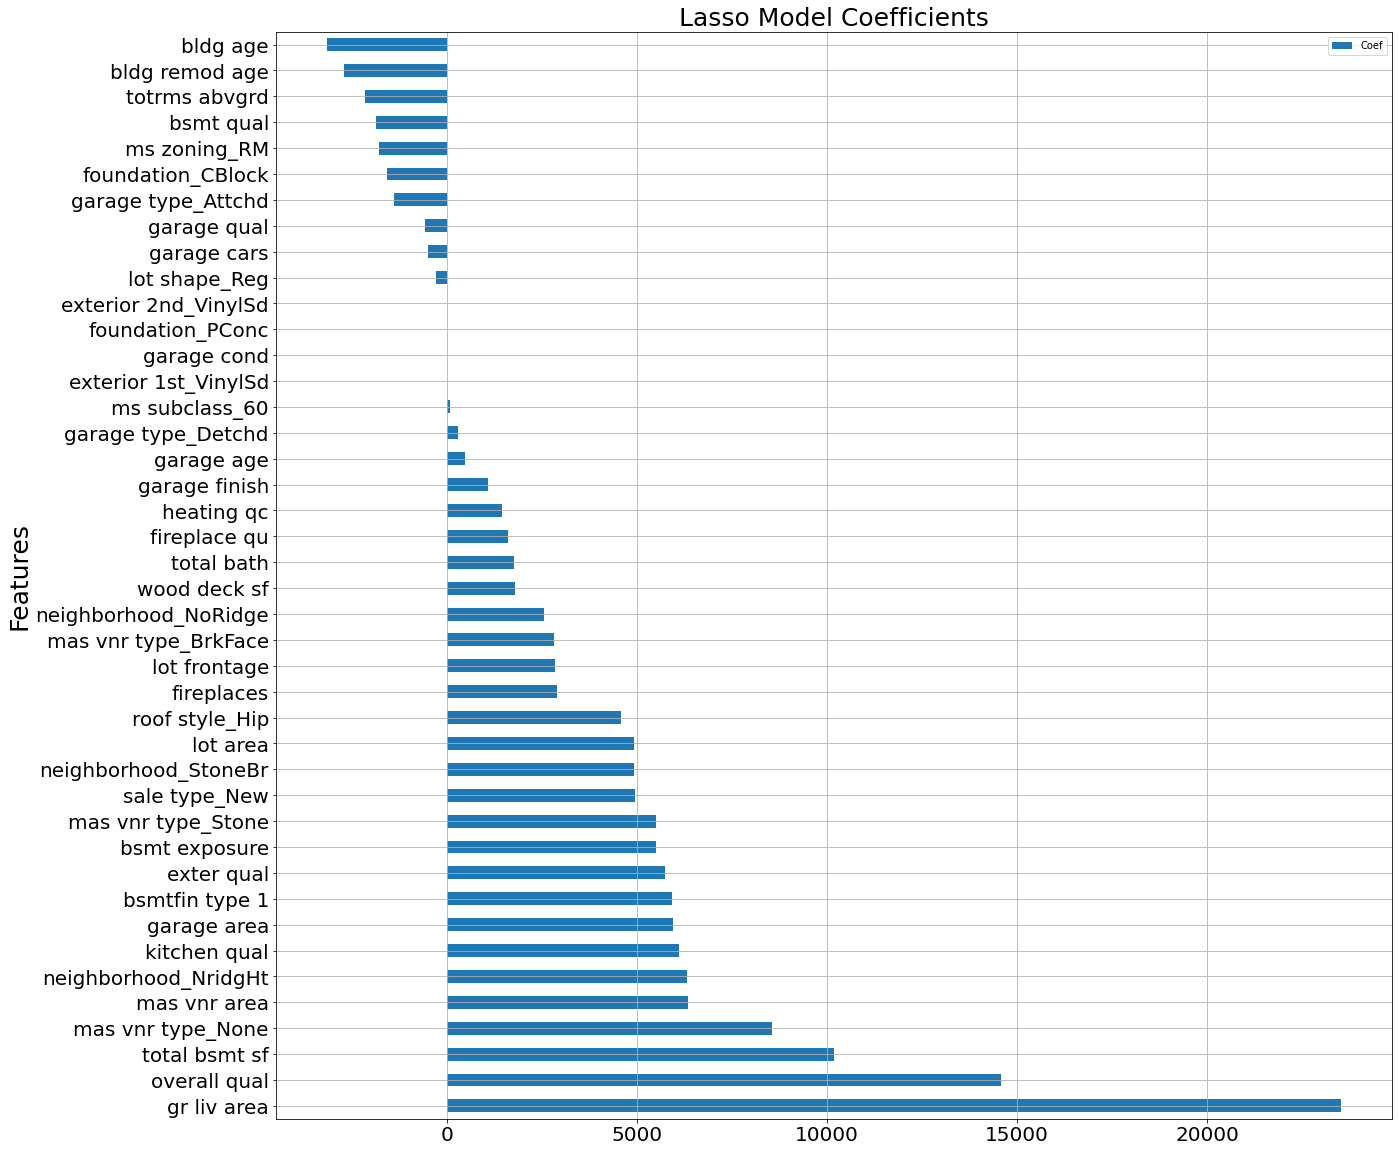

In [21]:
#Plotting bar chart to look at the Coefficients
pd.DataFrame(lasso_coef).plot.barh(figsize=(20,20))
plt.title('Lasso Model Coefficients',size=25)
plt.yticks(size = 20)
plt.xticks(size=20)
plt.ylabel('Features',size=25)
plt.grid()

Based on the above bar chart, we can see that majority are positive co-efficients.

In [22]:
lasso.intercept_

182789.222946545

The intercept value is 182789. This can indicate that the price of a property is 183,000 dollars if all features are 0.

In [23]:
lasso_coef.head()

,Coef
gr liv area,23536.762641
overall qual,14578.497431
total bsmt sf,10185.286631
mas vnr type_None,8558.687483
mas vnr area,6340.625020


The above table shows the top 5 predictors.

First in place is ground living area. Basically, it is due that properties are usually priced based on square feet. 

Overall quality is the second in place. Usually when the quality is better, the price will be higher.  

The other 3 features are total basement square feet, having no masonry veneer and its area.


#### Dropping of 0 valued co-efficients features

Now, we will be creating a new train data after dropping the 0 valued co-efficients features.

In [24]:
type(lasso_coef)

pandas.core.frame.DataFrame

In [25]:
#List of zero coef features
coef_drop = lasso_coef.loc[lasso_coef['Coef']==0]

In [26]:
coef_drop

,Coef
exterior 1st_VinylSd,-0.0
garage cond,-0.0
foundation_PConc,0.0
exterior 2nd_VinylSd,0.0


Above features are features with 0 co-efficients. They are not very good predictors for the model and therefore, will be eliminated from the model.

In [27]:
#List of features that will be dropped
coef_drop = coef_drop.index.tolist()

In [28]:
#Dropping the 0 valued co-efficients features
train_final = train_cleaned.drop(columns = (coef_drop))

In [29]:
#Final features used
train_final.head()

,lot frontage,lot area,overall qual,mas vnr area,exter qual,bsmt qual,bsmt exposure,bsmtfin type 1,total bsmt sf,heating qc,gr liv area,kitchen qual,totrms abvgrd,fireplaces,fireplace qu,garage finish,garage cars,garage area,garage qual,wood deck sf,saleprice,ms subclass_60,ms zoning_RM,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_StoneBr,roof style_Hip,foundation_CBlock,sale type_New,lot shape_Reg,mas vnr type_BrkFace,mas vnr type_None,mas vnr type_Stone,garage type_Attchd,garage type_Detchd,bldg age,bldg remod age,garage age,total bath
0,72.774648,13517,6,289.0,4,3,1,6,725.0,5,1479,4,6,0,0,2,2.0,475.0,3,0,130500,1,0,0,0,0,0,1,0,0,1,0,0,1,0,44,15,44.0,4.0
1,43.000000,11492,7,132.0,4,4,1,6,913.0,5,2122,4,8,1,3,2,2.0,559.0,3,0,220000,1,0,0,0,0,0,0,0,0,1,0,0,1,0,24,23,23.0,5.0
2,68.000000,7922,5,0.0,3,3,1,6,1057.0,3,1057,4,5,0,0,1,1.0,246.0,3,0,109000,0,0,0,0,0,0,1,0,1,0,1,0,0,1,67,13,67.0,2.0
3,73.000000,9802,5,0.0,3,4,1,1,384.0,4,1444,3,7,0,0,3,2.0,400.0,3,100,174000,1,0,0,0,0,0,0,0,1,0,1,0,0,0,14,13,13.0,4.0
4,82.000000,14235,6,0.0,3,2,1,1,676.0,3,1445,3,6,0,0,1,2.0,484.0,3,0,138500,0,0,0,0,0,0,0,0,0,0,1,0,0,1,120,27,63.0,2.0


In [30]:
#Final cleaned data set
train_final.shape

(2046, 39)

### Modeling  for predictions

Four different methods will be used to build the final model for predictions. Methods used will be lasso regression, linear regression, ridge regression and elastic net regression. Between these models, I will choose the model with the best R2 and Root Mean Square Error

In [31]:
#Preparing columns for the final predictions
columns = [col for col in train_final._get_numeric_data().columns if col != 'saleprice']

In [32]:
#Inputting X and y as predictor and response variable 
X = train_final[columns]
y = train_final['saleprice']

In [33]:
#Verifying the shape of X
X.shape

(2046, 38)

In [34]:
#Verifying the shape of y
y.shape

(2046,)

In [35]:
##Train test split for the final dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [36]:
X_train.shape

(1432, 38)

In [37]:
y_train.shape

(1432,)

In [38]:
#Scaling the data to standardize them
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled_2 = ss.transform(X_train)
X_test_scaled_2 = ss.transform(X_test)

#### Lasso Regression


In [39]:
lasso = LassoCV(n_alphas=100)

In [40]:
#Fitting of data into model
lasso.fit(X_train_scaled_2,y_train)

LassoCV()

In [41]:
#Testing the model on the test data from the split
lasso_pred = lasso.predict(X_test_scaled_2)

In [42]:
print (f' Lasso Regression score: {(lasso.score(X_test_scaled_2, y_test))}')
print (f' Lasso Regression rmse: {(np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))}')

 Lasso Regression score: 0.8722614365847061
 Lasso Regression rmse: 26582.615798417668


In [43]:
lasso_resid = lasso_pred - y_test

Text(0.5, 0, 'Predictions')

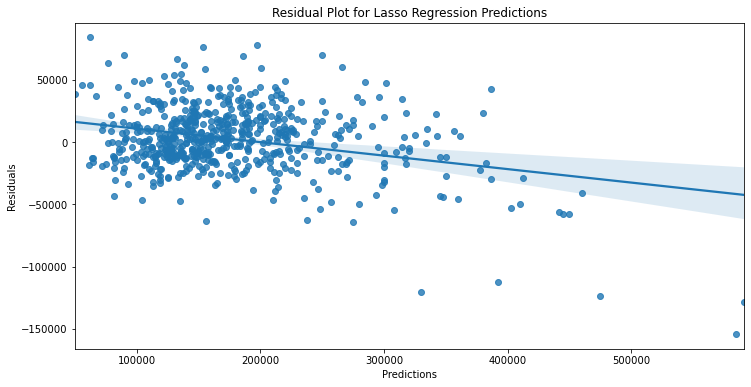

In [44]:
plt.figure(figsize=(12,6))
sns.regplot(y_test,lasso_resid)
plt.title('Residual Plot for Lasso Regression Predictions')
plt.ylabel('Residuals')
plt.xlabel('Predictions')

Looking at the scores for lasso model predictions, the score is 0.872. The RMSE is 26582.

In the above residual plot, most of the values are close to zero. However, there are a few outliers. 

##### Linear Regression

In [45]:
#Instantiating linear regression
lr = LinearRegression()

In [46]:
#Fitting of data
lr.fit(X_train_scaled_2, y_train)

LinearRegression()

In [47]:
#Getting prediction
lr_pred= lr.predict(X_test_scaled_2)

In [48]:
print (f' Linear Regression score: {(lr.score(X_test_scaled_2, y_test))}')
print (f' Linear Regression rmse: {(np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))}')

 Linear Regression score: 0.8710621186935662
 Linear Regression rmse: 26707.11431959701


In [49]:
#Getting the residual
lr_resid = lr_pred - y_test

Text(0.5, 0, 'Predictions')

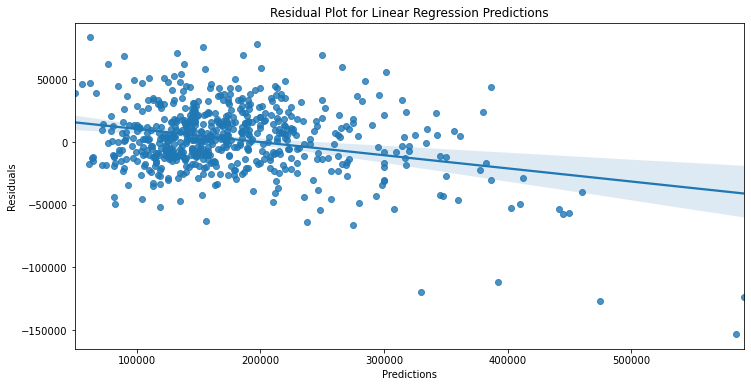

In [50]:
#Residual plotting
plt.figure(figsize=(12,6))
sns.regplot(y_test,lr_resid)
plt.title('Residual Plot for Linear Regression Predictions')
plt.ylabel('Residuals')
plt.xlabel('Predictions')

Looking at the scores for linear regression predictions, it did not perform as well as the lasso model. Its score is 0.871 and RMSE is 26707.

In the above residual plot, most of the values are close to zero. However, there are potential outliers.

##### Ridge Regression

In [51]:
rd = RidgeCV(alphas = np.linspace(0.1,10,100)) 

In [52]:
rd.fit(X_train_scaled_2, y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [53]:
#Getting the score for the model
ridge_cv_scores = cross_val_score(rd, X_train_scaled_2,y_train,cv=5)
ridge_cv_mse_scores = -cross_val_score(rd, X_train_scaled_2,y_train,cv=5,scoring='neg_mean_squared_error')
ridge_cv_rmse_scores = (ridge_cv_mse_scores) ** 0.5

In [54]:
rd_pred = rd.predict(X_test_scaled_2)

In [55]:
print (f' Ridge Regression score: {(rd.score(X_test_scaled_2, y_test))}')
print (f' Ridge Regression rmse: {(np.sqrt(metrics.mean_squared_error(y_test, rd_pred)))}')

 Ridge Regression score: 0.8712341333985157
 Ridge Regression rmse: 26689.293530339357


In [56]:
#Getting residual for residual plot
rd_resid = rd_pred - y_test

Text(0.5, 0, 'Predictions')

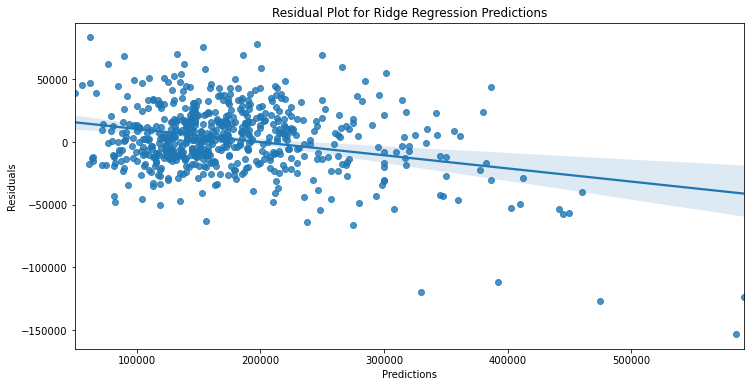

In [57]:
plt.figure(figsize=(12,6))
sns.regplot(y_test,rd_resid)
plt.title('Residual Plot for Ridge Regression Predictions')
plt.ylabel('Residuals')
plt.xlabel('Predictions')

Looking at the scores for ridge regression predictions, it did not perform as well as the lasso model. Its score is 0.871 and RMSE is 26689.

In the above residual plot, most of the values are close to zero. However, there are potential outliers.

##### ElasticNet Regression

In [58]:
enet = ElasticNet(alpha=1.0,l1_ratio=0.5)

In [59]:
enet.fit(X_train_scaled_2, y_train)

ElasticNet()

In [60]:
enet_pred = enet.predict(X_test_scaled_2)

In [61]:
print (f' Elastic Net Regression score: {(enet.score(X_test_scaled_2, y_test))}')
print (f' Elastic Regression rmse: {(np.sqrt(metrics.mean_squared_error(y_test, enet_pred)))}')

 Elastic Net Regression score: 0.869400427812207
 Elastic Regression rmse: 26878.657771591414


In [62]:
enet_resid = enet_pred - y_test

Text(0.5, 1.0, 'Residual Plot for ElasticNet Regression Predictions')

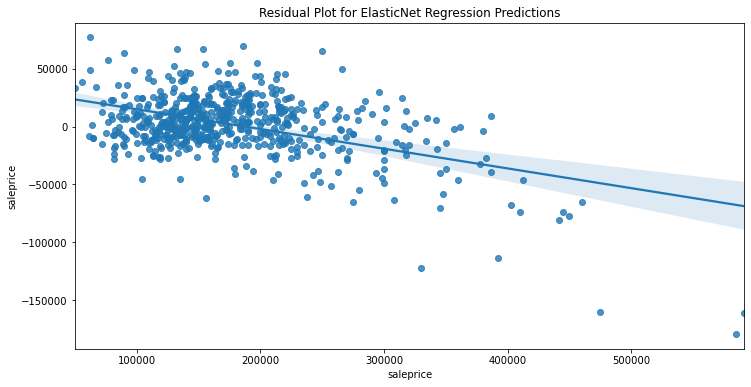

In [63]:
plt.figure(figsize=(12,6))
sns.regplot(y_test,enet_resid)
plt.title('Residual Plot for ElasticNet Regression Predictions')

Looking at the scores for the elasticnet regression predictions, it did not perform as well as the lasso model. Its score is 0.869 and RMSE is 26878.

In the above residual plot, most of the values are close to zero. However, there are potential outliers.

### Model Decision

In this section, I will be comparing the R2 and RMSE scores between all four methods, then I will select the best method for the final prediction

In [64]:
R2 = pd.DataFrame({'Linear Regression': [metrics.r2_score(y_test, lr_pred)],
                   'Ridge Regression': [metrics.r2_score(y_test, rd_pred)],
                 'Lasso Regression': [metrics.r2_score(y_test, lasso_pred)], 
                  'ElasticNet Regression': [metrics.r2_score(y_test, enet_pred)]})

In [65]:
R2.T.sort_values(0,ascending=False)

,0
Lasso Regression,0.872261
Ridge Regression,0.871234
Linear Regression,0.871062
ElasticNet Regression,0.869400


In [66]:
RMSE = pd.DataFrame({'Linear Regression': [np.sqrt(metrics.mean_squared_error(y_test, lr_pred))],
                   'Ridge Regression': [np.sqrt(metrics.mean_squared_error(y_test, rd_pred))],
                 'Lasso Regression': [np.sqrt(metrics.mean_squared_error(y_test, lasso_pred))], 
                  'ElasticNet Regression': [np.sqrt(metrics.mean_squared_error(y_test, enet_pred))]})

In [67]:
RMSE.T.sort_values(0,ascending=True)

,0
Lasso Regression,26582.615798
Ridge Regression,26689.293530
Linear Regression,26707.114320
ElasticNet Regression,26878.657772


Based on the above RMSE and R2 scores, it seems that lasso regression model outperformed the rest of the models. So I will be using lasso regression model to make the final prediction.

### Test Dataset Prediction

Before making the prediction, I will be cleaning up the test dataset and making sure the columns standardized with the train dataset.

In [68]:
#Checking the shape of the test dataset
test_cleaned.shape

(879, 167)

In [69]:
#final train dataset columns
train_final.columns

Index(['lot frontage', 'lot area', 'overall qual', 'mas vnr area',
       'exter qual', 'bsmt qual', 'bsmt exposure', 'bsmtfin type 1',
       'total bsmt sf', 'heating qc', 'gr liv area', 'kitchen qual',
       'totrms abvgrd', 'fireplaces', 'fireplace qu', 'garage finish',
       'garage cars', 'garage area', 'garage qual', 'wood deck sf',
       'saleprice', 'ms subclass_60', 'ms zoning_RM', 'neighborhood_NoRidge',
       'neighborhood_NridgHt', 'neighborhood_StoneBr', 'roof style_Hip',
       'foundation_CBlock', 'sale type_New', 'lot shape_Reg',
       'mas vnr type_BrkFace', 'mas vnr type_None', 'mas vnr type_Stone',
       'garage type_Attchd', 'garage type_Detchd', 'bldg age',
       'bldg remod age', 'garage age', 'total bath'],
      dtype='object')

In [70]:
test_cleaned.columns

Index(['lot frontage', 'lot area', 'overall qual', 'overall cond',
       'mas vnr area', 'exter qual', 'exter cond', 'bsmt qual', 'bsmt cond',
       'bsmt exposure',
       ...
       'garage type_BuiltIn', 'garage type_CarPort', 'garage type_Detchd',
       'garage type_NA', 'quarter sold', 'bldg age', 'bldg remod age',
       'garage age', 'total bath', 'porch sf'],
      dtype='object', length=167)

In [71]:
#Making sure test_cleaned have all the train_final columns
for i in train_final.columns:
    if i not in test_cleaned.columns:
        test_cleaned[i] = 0

In [72]:
test_cleaned.head()

,lot frontage,lot area,overall qual,overall cond,mas vnr area,exter qual,exter cond,bsmt qual,bsmt cond,bsmt exposure,bsmtfin type 1,bsmtfin type 2,total bsmt sf,heating qc,gr liv area,bedroom abvgr,kitchen abvgr,kitchen qual,totrms abvgrd,functional,fireplaces,fireplace qu,garage finish,garage cars,garage area,garage qual,garage cond,wood deck sf,pool area,pool qc,fence,misc val,ms subclass_30,ms subclass_40,ms subclass_45,ms subclass_50,ms subclass_60,ms subclass_70,ms subclass_75,ms subclass_80,ms subclass_85,ms subclass_90,ms subclass_120,ms subclass_160,ms subclass_180,ms subclass_190,ms zoning_FV,ms zoning_I (all),ms zoning_RH,ms zoning_RL,ms zoning_RM,lot config_CulDSac,lot config_FR2,lot config_FR3,lot config_Inside,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition 1_Feedr,condition 1_Norm,condition 1_PosA,condition 1_PosN,condition 1_RRAe,condition 1_RRAn,condition 1_RRNe,condition 1_RRNn,bldg type_2fmCon,bldg type_Duplex,bldg type_Twnhs,bldg type_TwnhsE,house style_1.5Unf,house style_1Story,house style_2.5Fin,house style_2.5Unf,house style_2Story,house style_SFoyer,house style_SLvl,roof style_Gable,roof style_Gambrel,roof style_Hip,roof style_Mansard,roof style_Shed,exterior 1st_AsphShn,exterior 1st_BrkComm,exterior 1st_BrkFace,exterior 1st_CemntBd,exterior 1st_HdBoard,exterior 1st_MetalSd,exterior 1st_Plywood,exterior 1st_PreCast,exterior 1st_Stucco,exterior 1st_VinylSd,exterior 1st_Wd Sdng,exterior 1st_WdShing,exterior 2nd_AsphShn,exterior 2nd_Brk Cmn,exterior 2nd_BrkFace,exterior 2nd_CBlock,exterior 2nd_CmentBd,exterior 2nd_HdBoard,exterior 2nd_ImStucc,exterior 2nd_MetalSd,exterior 2nd_Other,exterior 2nd_Plywood,exterior 2nd_PreCast,exterior 2nd_Stucco,exterior 2nd_VinylSd,exterior 2nd_Wd Sdng,exterior 2nd_Wd Shng,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,sale type_CWD,sale type_Con,sale type_ConLD,sale type_ConLI,sale type_ConLw,sale type_New,sale type_Oth,sale type_VWD,sale type_WD,lot shape_IR2,lot shape_IR3,lot shape_Reg,land contour_HLS,land contour_Low,land contour_Lvl,mas vnr type_BrkFace,mas vnr type_CBlock,mas vnr type_None,mas vnr type_Stone,garage type_Attchd,garage type_Basment,garage type_BuiltIn,garage type_CarPort,garage type_Detchd,garage type_NA,quarter sold,bldg age,bldg remod age,garage age,total bath,porch sf,saleprice
0,69.000000,9142,6,8,0.0,3,2,2,3,1,1,1,1020,4,1928,4,2,2,9,8,0,0,1,1,440,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,2,110,70,110.0,2,172,0
1,79.222222,9662,5,4,0.0,3,3,4,3,1,1,1,1967,3,1967,6,2,3,10,8,0,0,3,2,580,3,3,170,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,3,43,43,43.0,2,0,0
2,58.000000,17104,7,5,0.0,4,3,4,4,3,6,1,654,5,1496,3,1,4,7,8,1,4,2,2,426,3,3,100,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,3,14,14,14.0,5,24,0
3,60.000000,8520,5,6,0.0,4,3,3,3,1,1,1,968,3,968,2,1,3,5,8,0,0,1,2,480,2,3,0,0,0,0,0,1,0,

In [73]:
final_cols = train_final.columns 

In [74]:
#selecting only train_trial_2 columns to new dataframe
final_test = test_cleaned[final_cols] 

In [75]:
final_test.head()

,lot frontage,lot area,overall qual,mas vnr area,exter qual,bsmt qual,bsmt exposure,bsmtfin type 1,total bsmt sf,heating qc,gr liv area,kitchen qual,totrms abvgrd,fireplaces,fireplace qu,garage finish,garage cars,garage area,garage qual,wood deck sf,saleprice,ms subclass_60,ms zoning_RM,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_StoneBr,roof style_Hip,foundation_CBlock,sale type_New,lot shape_Reg,mas vnr type_BrkFace,mas vnr type_None,mas vnr type_Stone,garage type_Attchd,garage type_Detchd,bldg age,bldg remod age,garage age,total bath
0,69.000000,9142,6,0.0,3,2,1,1,1020,4,1928,2,9,0,0,1,1,440,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,110,70,110.0,2
1,79.222222,9662,5,0.0,3,4,1,1,1967,3,1967,3,10,0,0,3,2,580,3,170,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,43,43,43.0,2
2,58.000000,17104,7,0.0,4,4,3,6,654,5,1496,4,7,1,4,2,2,426,3,100,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,14,14,14.0,5
3,60.000000,8520,5,0.0,4,3,1,1,968,3,968,3,5,0,0,1,2,480,2,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,97,14,85.0,1
4,75.254545,9500,6,247.0,3,4,1,4,1394,4,1394,3,6,2,4,2,2,514,3,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,57,57,57.0,4


In [76]:
final_test = final_test.drop(columns = 'saleprice')

In [77]:
final_test.shape

(879, 38)

In [78]:
final_test.columns

Index(['lot frontage', 'lot area', 'overall qual', 'mas vnr area',
       'exter qual', 'bsmt qual', 'bsmt exposure', 'bsmtfin type 1',
       'total bsmt sf', 'heating qc', 'gr liv area', 'kitchen qual',
       'totrms abvgrd', 'fireplaces', 'fireplace qu', 'garage finish',
       'garage cars', 'garage area', 'garage qual', 'wood deck sf',
       'ms subclass_60', 'ms zoning_RM', 'neighborhood_NoRidge',
       'neighborhood_NridgHt', 'neighborhood_StoneBr', 'roof style_Hip',
       'foundation_CBlock', 'sale type_New', 'lot shape_Reg',
       'mas vnr type_BrkFace', 'mas vnr type_None', 'mas vnr type_Stone',
       'garage type_Attchd', 'garage type_Detchd', 'bldg age',
       'bldg remod age', 'garage age', 'total bath'],
      dtype='object')

In [79]:
#Standardizing the test data
ss = StandardScaler()
ss.fit(final_test)
final_test_scaled = ss.transform(final_test)

In [80]:
#Applying model for prediction
lasso_test_predictions = lasso.predict(final_test_scaled)

In [81]:
#Creating dataframe for predicted results
load_id = test['Id']
sub_test_lasso = pd.DataFrame({'Id':load_id,
                          'SalePrice':lasso_test_predictions})
    

In [82]:
#Creating file for submission
sub_test_lasso.to_csv('datasets/submission_final.csv',index=False)

## Submission and Conclusion

After selecting and using Lasso as my model, I have gotten 31699 as my public score.


##### Key takeaways from the Project:

1) There were alot of null values. I have cleaned them up by understanding the reason behind the null values. It can be related to other features in the same category, such as null values in misc features and how it is linked to misc values.

2) Certain features are correlated and can form multicollinearity between them. Examples are total basement square feet, basement unfinished square feet, basement type 1 square feet, and basement type 2 square feet.

3) From the data exploration and modeling using lasso regression, I have found out several different features have different impact on the price. Such as ground living area, overall quality and total basement surface are very positively correlated with the sale price. Age seems to have a huge impact on the price as well, as when a property get older, the price will get lower.

##### Limitations:

1) Despite having strong correlation or multicollinerity between the features, dropping some of them may have affected the model.

Additionally, more could be done to improve the model. As I have only worked with Linear,Lasso,Ridge and Elastic Net model for this project, other models might be a better fit.

Other features of properties can be included as well to better improve the model such as cost of constructing or remodelling the property, nearest public transportation in terms of distance or how many times the property have been switched hands.